<a href="https://colab.research.google.com/github/59822/ridge_normal_distr/blob/main/Normal_distrib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shashanknecrothapa/ames-housing-dataset")

print("Path to dataset files:", path)

100%|██████████| 185k/185k [00:00<00:00, 34.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shashanknecrothapa/ames-housing-dataset/versions/1


In [10]:
import os
import shutil

pati = os.path.basename(path) #Devuelve el nombre
dest ='/content/'+pati

if not os.path.exists(dest):
  shutil.move(path, dest)
  print("ya lo movi")
else:
  print("Ya estaba movido ok")

ya lo movi


In [12]:
import pandas as pd

df = pd.read_csv("/content/1/AmesHousing.csv")
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [13]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [15]:
# Estas son las columnas del dataset de viviendas de Ames, Iowa.

# Identificador único de la propiedad.
'Order',

# Identificador único de la parcela.
'PID',

# Clase de construcción de la vivienda.
'MS SubClass',

# Clasificación de la zona donde se ubica la vivienda.
'MS Zoning',

# Ancho del lote en pies lineales.
'Lot Frontage',

# Área del lote en pies cuadrados.
'Lot Area',

# Tipo de calle de acceso a la propiedad.
'Street',

# Tipo de callejón de acceso a la propiedad.
'Alley',

# Forma general del lote.
'Lot Shape',

# Planitud del terreno.
'Land Contour',

# Tipo de servicios públicos disponibles.
'Utilities',

# Configuración del lote en relación a la calle.
'Lot Config',

# Pendiente del terreno.
'Land Slope',

# Barrio físico dentro de los límites de la ciudad de Ames.
'Neighborhood',

# Condición física cercana o influenciadora de la propiedad.
'Condition 1',

# Condición física cercana o influenciadora de la propiedad (si existe una segunda).
'Condition 2',

# Tipo de vivienda (1Fam, 2FmCon, etc.).
'Bldg Type',

# Estilo de la vivienda (1Story, 2Story, etc.).
'House Style',

# Clasificación general de la calidad de los materiales y acabados.
'Overall Qual',

# Clasificación general del estado y la condición de la vivienda.
'Overall Cond',

# Fecha original de construcción.
'Year Built',

# Fecha de remodelación o adición (igual que la fecha de construcción si no se ha remodelado o añadido).
'Year Remod/Add',

# Tipo de techo.
'Roof Style',

# Material del techo.
'Roof Matl',

# Revestimiento exterior de la casa.
'Exterior 1st',

# Revestimiento exterior de la casa (si hay más de un material).
'Exterior 2nd',

# Tipo de revestimiento de mampostería.
'Mas Vnr Type',

# Área del revestimiento de mampostería en pies cuadrados.
'Mas Vnr Area',

# Calidad del material exterior.
'Exter Qual',

# Condición actual del material exterior.
'Exter Cond',

# Tipo de cimentación.
'Foundation',

# Altura del sótano.
'Bsmt Qual',

# Condición general del sótano.
'Bsmt Cond',

# Paredes con acceso al exterior o jardín.
'Bsmt Exposure',

# Calidad de la zona habitable del sótano.
'BsmtFin Type 1',

# Pies cuadrados terminados del tipo 1.
'BsmtFin SF 1',

# Calidad de la segunda zona habitable terminada (si existe).
'BsmtFin Type 2',

# Pies cuadrados terminados del tipo 2.
'BsmtFin SF 2',

# Pies cuadrados sin terminar del área del sótano.
'Bsmt Unf SF',

# Pies cuadrados totales del área del sótano.
'Total Bsmt SF',

# Tipo de calefacción.
'Heating',

# Calidad y condición del sistema de calefacción.
'Heating QC',

# Aire acondicionado central.
'Central Air',

# Sistema eléctrico.
'Electrical',

# Pies cuadrados del primer piso (sobre el nivel del suelo).
'1st Flr SF',

# Pies cuadrados del segundo piso (sobre el nivel del suelo).
'2nd Flr SF',

# Pies cuadrados de acabados de baja calidad (todos los pisos).
'Low Qual Fin SF',

# Pies cuadrados habitables sobre el nivel del suelo (sin incluir sótanos).
'Gr Liv Area',

# Baños completos en el sótano.
'Bsmt Full Bath',

# Medios baños en el sótano.
'Bsmt Half Bath',

# Baños completos sobre el nivel del suelo.
'Full Bath',

# Medios baños sobre el nivel del suelo.
'Half Bath',

# Número de dormitorios sobre el nivel del suelo (no incluye dormitorios en el sótano).
'Bedroom AbvGr',

# Número de cocinas sobre el nivel del suelo.
'Kitchen AbvGr',

# Calidad de la cocina.
'Kitchen Qual',

# Número total de habitaciones sobre el nivel del suelo (no incluye baños).
'TotRms AbvGrd',

# Calificación de la funcionalidad de la casa.
'Functional',

# Número de chimeneas.
'Fireplaces',

# Calidad de la chimenea.
'Fireplace Qu',

# Ubicación del garaje.
'Garage Type',

# Año de construcción del garaje.
'Garage Yr Blt',

# Acabado interior del garaje.
'Garage Finish',

# Tamaño del garaje en capacidad de coches.
'Garage Cars',

# Área del garaje en pies cuadrados.
'Garage Area',

# Calidad de la construcción del garaje.
'Garage Qual',

# Condición del garaje.
'Garage Cond',

# Entrada pavimentada para coches.
'Paved Drive',

# Área de la terraza de madera en pies cuadrados.
'Wood Deck SF',

# Área del porche abierto en pies cuadrados.
'Open Porch SF',

# Área del porche cerrado en pies cuadrados.
'Enclosed Porch',

# Área del porche de tres estaciones en pies cuadrados.
'3Ssn Porch',

# Área del porche con mosquitero en pies cuadrados.
'Screen Porch',

# Área de la piscina en pies cuadrados.
'Pool Area',

# Calidad de la piscina.
'Pool QC',

# Calidad de la valla.
'Fence',

# Característica miscelánea que no está cubierta en otras categorías.
'Misc Feature',

# Valor en dólares de la característica miscelánea.
'Misc Val',

# Mes en que se vendió la casa.
'Mo Sold',

# Año en que se vendió la casa.
'Yr Sold',

# Tipo de venta.
'Sale Type',

# Condición de la venta.
'Sale Condition',

# Precio de venta de la propiedad en dólares.
'SalePrice'


'SalePrice'

In [18]:
df.shape

(2930, 82)

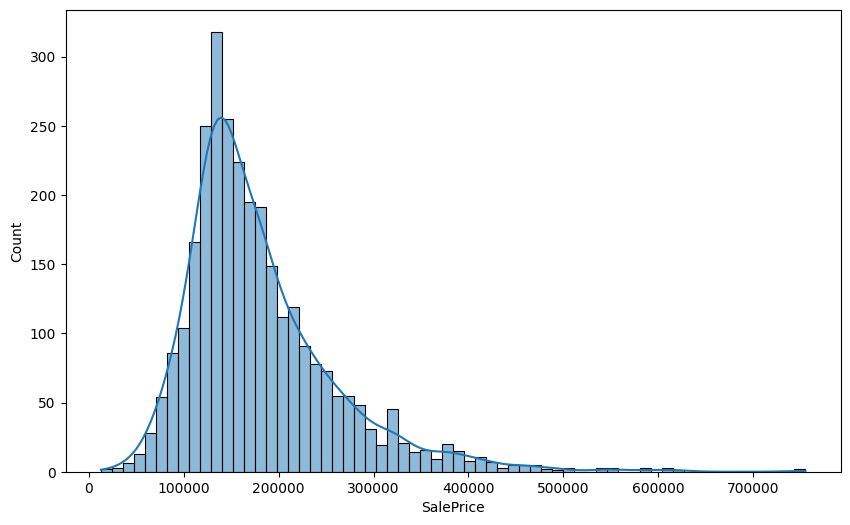

In [21]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(data=df['SalePrice'], kde= True)
plt.show()

In [22]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [24]:
# Como está muy grande el dataset vamos a usar tecnicas de muestreo

# Muestreo
sample_df = df.sample(frac = 0.1, random_state=42)
sample_df.shape


(293, 82)

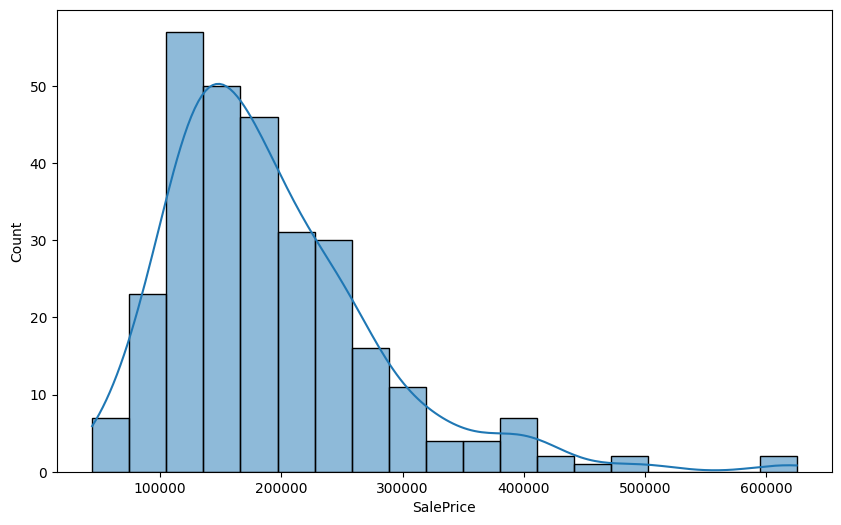

In [29]:
# Al tener tantas muestras podemos aplicar el teorema del limite central con distribucion normal

plt.figure(figsize=(10,6))
sns.histplot(data = sample_df['SalePrice'], kde= True)
plt.show()

In [26]:
# Muestre estratificado
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits= 1,test_size=0.1, random_state=42)

for train_index, test_index in split.split(df, df['Overall Qual']): #Conjunto df, estratificado por overall
#train_index indices de train y rtest
    strat_sample_df = df.loc[test_index] #Filas con indices conjunto test


strat_sample_df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1616,1617,527107040,60,RL,NaN,10364,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,168000
2073,2074,905352180,60,RL,97.0,10029,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2007,WD,Normal,211000
2909,2910,923225240,160,RM,41.0,2665,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,127000
944,945,911370500,120,RM,44.0,3843,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,230000
1228,1229,535103050,60,RL,NaN,13700,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,5,2008,WD,Normal,201800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,1426,906412010,20,RL,91.0,11778,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2008,WD,Abnorml,475000
420,421,528102040,20,RL,96.0,12456,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,337500
2841,2842,909101080,50,RL,45.0,8248,Pave,Grvl,Reg,Lvl,...,0,NaN,NaN,NaN,0,9,2006,COD,Abnorml,83000
2165,2166,907420060,60,RL,64.0,8333,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,168675


In [27]:
strat_sample_df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

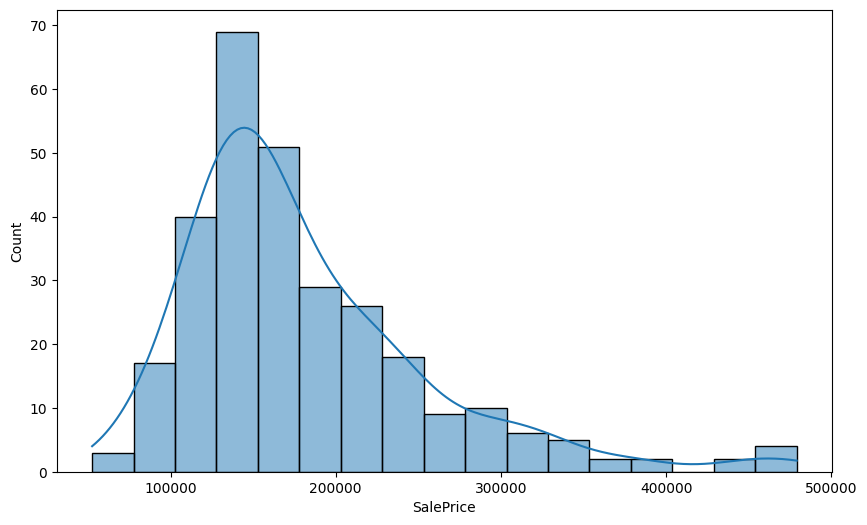

In [28]:
# Al tener tantas muestras podemos aplicar el teorema del limite central con distribucion normal

plt.figure(figsize=(10,6))
sns.histplot(data = strat_sample_df['SalePrice'], kde= True)
plt.show()

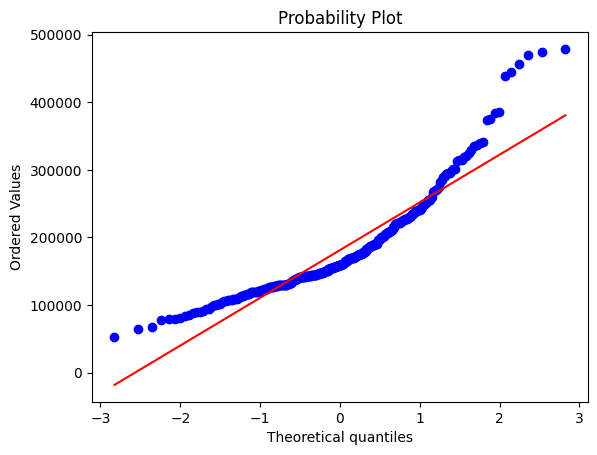

In [30]:
import scipy.stats as stats

stats.probplot(strat_sample_df['SalePrice'], dist="norm", plot=plt)
plt.show()


## Qq tiene que seguir igual

In [31]:
# COmo no salio hay que normalizar, porque hay una cola a la derecha vamos a usar el logaritmo
import numpy as np
strat_sample_df['SalePrice'] = np.log(strat_sample_df['SalePrice'])

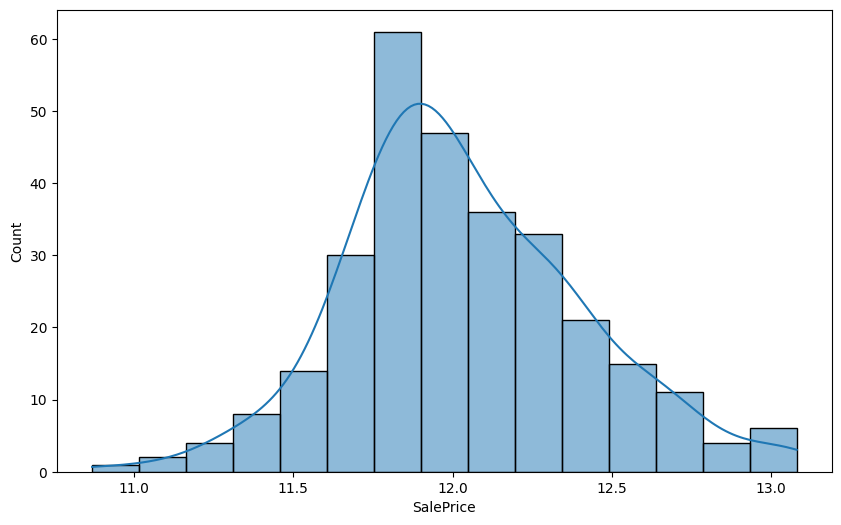

In [32]:

plt.figure(figsize=(10,6))
sns.histplot(data = strat_sample_df['SalePrice'], kde= True)
plt.show()

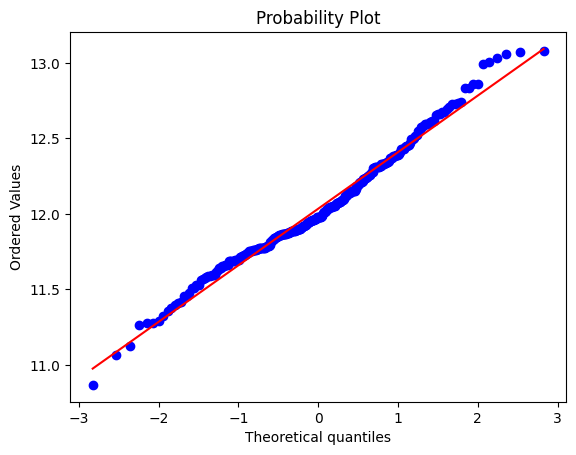

In [33]:
stats.probplot(strat_sample_df['SalePrice'], dist="norm", plot=plt)
plt.show()

In [35]:
# vamos a normalizar a ver que pasa
from sklearn.preprocessing import MinMaxScaler

m = MinMaxScaler()
strat_sample_df['SalePrice'] = m.fit_transform(strat_sample_df[['SalePrice']])

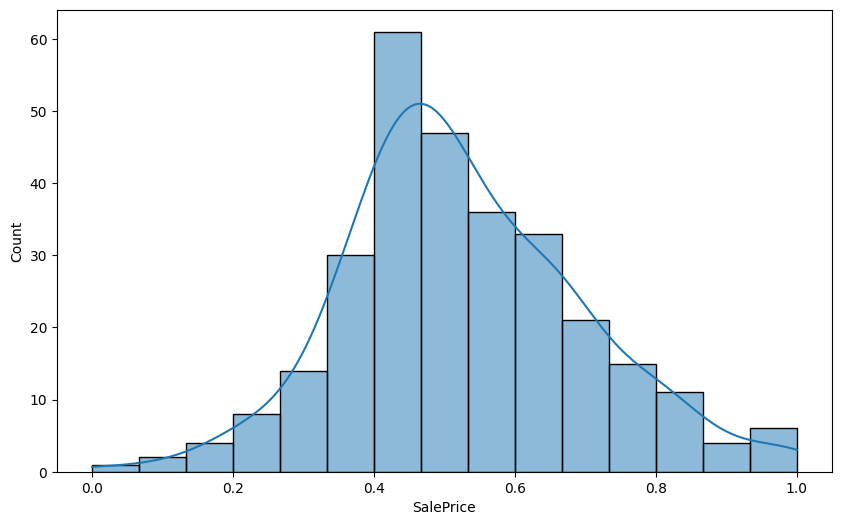

In [36]:

plt.figure(figsize=(10,6))
sns.histplot(data = strat_sample_df['SalePrice'], kde= True)
plt.show()

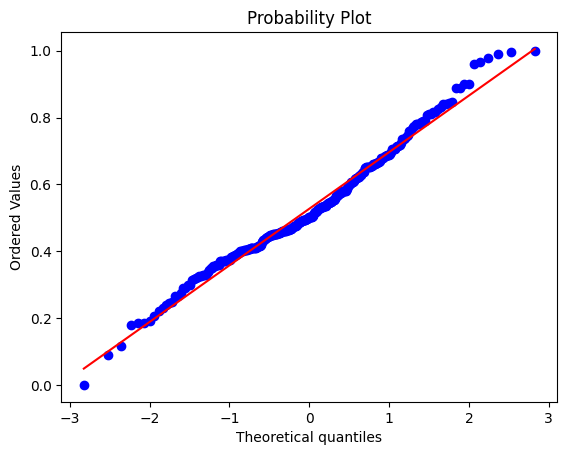

In [37]:
stats.probplot(strat_sample_df['SalePrice'], dist="norm", plot=plt)
plt.show()

In [41]:
hola = strat_sample_df.dtypes
non_numeric_cols = hola[~hola.isin([np.dtype('int64'), np.dtype('float64')])].index.tolist()

print(non_numeric_cols) # To display the list of column names

['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature', 'Sale Type', 'Sale Condition']


In [44]:
hola = strat_sample_df.dtypes
no_int_float = hola[~hola.isin([np.dtype('int64'), np.dtype('float64')])].index.tolist()

print(no_int_float)

['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature', 'Sale Type', 'Sale Condition']


In [46]:
# Ya que descubrmos eso vamos a haccer una codificacion one-hot

# no_int_float = [] Es una lista de las categorcas
X = strat_sample_df.drop(columns = ['SalePrice'])
y = strat_sample_df['SalePrice']

X = pd.get_dummies(X, columns= no_int_float)


In [48]:
# Como hay nulos vamos a eliminarlos no hay chance
X = X.dropna(axis=True)

In [49]:
# Ahora que intentamos ajustar el modelo por TLC vamos a aplicar Ridge

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

b
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.33, random_state =42)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_predicted = ridge.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


In [50]:
ridge_mse = mean_squared_error(y_test, y_predicted)

In [55]:
print(ridge.coef_)

[-7.55882225e-06 -1.63709046e-11 -9.40982083e-05  3.22041395e-06
  1.26217494e-04  2.76093712e-05  1.39267555e-03  1.14653807e-03
  3.89024691e-05  4.45067855e-06  8.73960948e-06  5.20927571e-05
  6.90280820e-05  6.87023345e-05 -5.13501917e-05  8.63802248e-05
  2.45097298e-05 -4.02291618e-06 -2.21337028e-05  2.24347335e-05
 -1.75713496e-05 -1.12146135e-05 -5.56256238e-06  4.81923386e-05
  3.28479955e-05  1.26611712e-04  5.24830241e-05 -8.75756819e-06
  1.21625468e-04  6.71513921e-05  2.38358139e-04  0.00000000e+00
 -6.71449754e-05  1.49599488e-03 -1.25530136e-05 -5.34167783e-06
  1.28802910e-06 -1.69098606e-06  6.91886384e-06 -1.17422905e-06
 -5.34167783e-06  5.34167783e-06 -1.11826482e-05 -1.07631508e-05
 -2.38322128e-05  9.42081608e-06  0.00000000e+00  1.44113967e-05
 -3.65252969e-05  2.16515387e-06  2.59701881e-06  3.17631242e-05
  0.00000000e+00 -1.02490765e-05 -2.30368941e-05  5.33992297e-06
  6.84211796e-07  2.72618358e-05  5.85885829e-06 -1.86280523e-06
 -3.99605306e-06 -8.84188

In [62]:
maximo = ridge.coef_.max()
minimo = ridge.coef_.min()

In [64]:
max_coef = np.argmax(ridge.coef_) #Index
min_coef = np.argmin(ridge.coef_) #Index

max_col = X.columns[max_coef]
min_col = X.columns[min_coef]

print(f"La columna con maximo es {max_col} con {maximo}\nLa de minimo es {min_col} con {minimo}")

La columna con maximo es Mo Sold con 0.0014959948837761864
La de minimo es MS SubClass con -9.409820832058033e-05


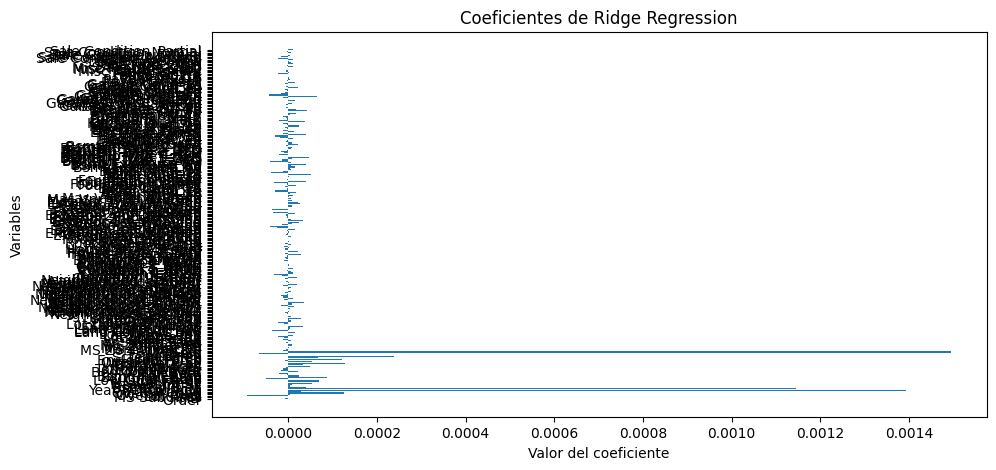

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener nombres de las variables
feature_names = X.columns  # Asegúrate de que X es tu DataFrame de variables independientes

# Graficar coeficientes
plt.figure(figsize=(10, 5))
plt.barh(feature_names, ridge.coef_)
plt.xlabel("oeficiente")
plt.ylabel("variables")
plt.title("Coeficientes de Ridge Regression")
plt.show()


In [52]:
print(f"MSE Ridge: {ridge_mse:.2f}")

MSE Ridge: 0.01
